<a href="https://colab.research.google.com/github/PYH1107/generative_ai/blob/main/HW3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 固定4行套件

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

訓練資料形狀: (50000, 32, 32, 3)
測試資料形狀: (10000, 32, 32, 3)
訓練標籤形狀: (50000, 1)
測試標籤形狀: (10000, 1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 612,042 (2.33 MB)

 Trainable params: 612,042 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 61s 364ms/step - accuracy: 0.2569 - loss: 2.0196 - val_accuracy: 0.4441 - val_loss: 1.5658
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 53s 331ms/step - accuracy: 0.4543 - loss: 1.5160 - val_accuracy: 0.5213 - val_loss: 1.3803
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 82s 329ms/step - accuracy: 0.5010 - loss: 1.3836 - val_accuracy: 0.5556 - val_loss: 1.2967
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 82s 330ms/step - accuracy: 0.5358 - loss: 1.3117 - val_accuracy: 0.5820 - val_loss: 1.2416
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 85s 350ms/step - accuracy: 0.5522 - loss: 1.2506 - val_accuracy: 0.6006 - val_loss: 1.1663
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 81s 345ms/step - accuracy: 0.5757 - loss: 1.1939 - val_accuracy: 0.6194 - val_loss: 1.1316
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 80s 332ms/step - accuracy: 0.5889 - loss: 1.1553 - val_accuracy: 0.6327 - val_loss: 1.0795
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 84s 346ms/step - accuracy: 0.6063 - loss: 1

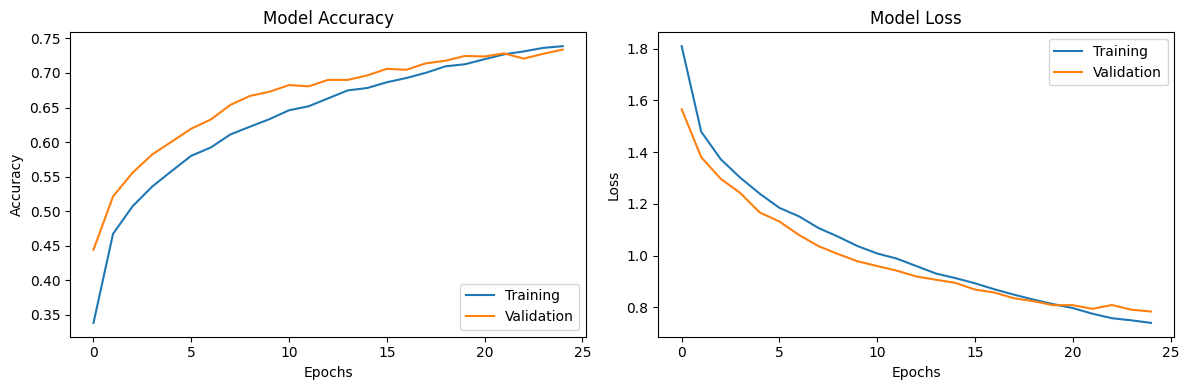

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

# Model configuration
img_width, img_height         = 32, 32
batch_size                    = 250
no_epochs                     = 25
no_classes                    = 10
validation_split              = 0.2
verbosity                     = 1

# Load CIFAR10 dataset
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# 輸出數據形狀以便確認
print(f"訓練資料形狀: {input_train.shape}")
print(f"測試資料形狀: {input_test.shape}")
print(f"訓練標籤形狀: {target_train.shape}")
print(f"測試標籤形狀: {target_test.shape}")

# Reshape data based on channels first / channels last strategy.
# This is dependent on whether you use TF, Theano or CNTK as backend.
if K.image_data_format() == 'channels_first':
    input_train = input_train.reshape(input_train.shape[0], 3, img_width, img_height)
    input_test = input_test.reshape(input_test.shape[0], 3, img_width, img_height)
    input_shape = (3, img_width, img_height)
else:
    input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 3)
    input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 3)
    input_shape = (img_width, img_height, 3)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data.
input_train = input_train / 255
input_test = input_test / 255

# Convert target vectors to categorical targets
target_train = keras.utils.to_categorical(target_train, no_classes)
target_test = keras.utils.to_categorical(target_test, no_classes)

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# 顯示模型摘要
model.summary()

# 修正：使用 categorical_crossentropy 替代 kullback_leibler_divergence
# 或者使用 KLDivergence() 類
kl_divergence = tf.keras.losses.KLDivergence()

# Compile the model
model.compile(loss=kl_divergence,  # 使用 KLDivergence 對象
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split
)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# 可選：繪製訓練歷史
import matplotlib.pyplot as plt

# 繪製訓練和驗證準確率
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='lower right')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')


plt.tight_layout()
plt.savefig('training_history.png')
plt.show()